In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

data = pd.read_csv('/content/iris.csv')
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa
59,5.2,2.7,3.9,1.4,versicolor
44,5.1,3.8,1.9,0.4,setosa
64,5.6,2.9,3.6,1.3,versicolor
50,7.0,3.2,4.7,1.4,versicolor


In [4]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     sepal_length  sepal_width  petal_length  petal_width
4             5.0          3.6           1.4          0.2
76            6.8          2.8           4.8          1.4
78            6.0          2.9           4.5          1.5
49            5.0          3.3           1.4          0.2
116           6.5          3.0           5.5          1.8
35        setosa
60    versicolor
69    versicolor
79    versicolor
34        setosa
Name: species, dtype: object


In [6]:
data["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

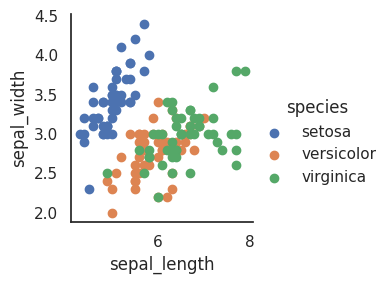

In [9]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.FacetGrid(data, hue="species") \
.map(plt.scatter, "sepal_length", "sepal_width") \
.add_legend();

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the 

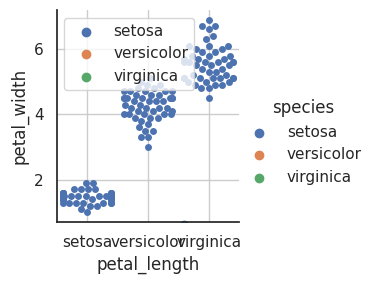

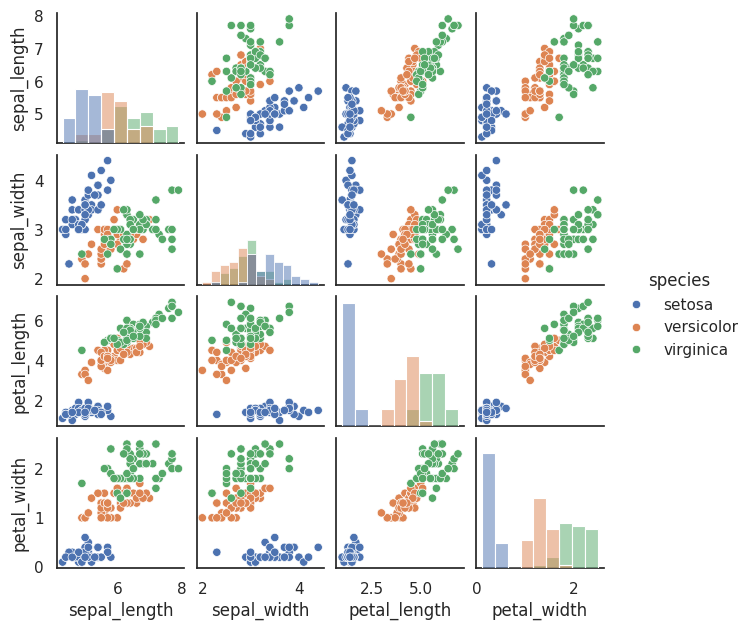

In [10]:
sns.FacetGrid(data, hue="species") \
.map(plt.scatter, "petal_length", "petal_width") \
.add_legend();

sns.swarmplot(x="species", y="petal_length", data=data)
plt.grid()

sns.pairplot(data, hue="species", diag_kind="hist", size=1.6);

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
86,1.038005,0.106445,0.535296,0.396172
72,0.553333,-1.281972,0.649027,0.396172
22,-1.506521,1.263460,-1.568735,-1.312977
42,-1.748856,0.337848,-1.398138,-1.312977
102,1.522676,-0.124958,1.217684,1.185010


In [12]:
from sklearn.decomposition import PCA
ndimensions = 2
pca = PCA(n_components=ndimensions, random_state=50)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])

X_pca.sample(5)

,PC1,PC2
3,-2.304197,-0.575368
76,1.254222,-0.082620
95,0.089053,-0.174909
101,1.153190,-0.701326
2,-2.367950,-0.318477


In [13]:
from sklearn.mixture import GaussianMixture
nclusters = 3
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y, y_cluster_gmm)
score

0.9038742317748124